In [1]:
# Creating HTML file from URL
from bs4 import BeautifulSoup
import requests

def save_website_html(url, filename):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            html_content = response.text

            soup = BeautifulSoup(html_content, 'html.parser')
            frmt_html = soup.prettify()

            with open(filename, 'w', encoding='utf-8') as file:
                file.write(frmt_html)
        else:
            print(f"Failed to retrieve HTML content! Status Code: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching the URL: {e}")

url = "https://www.daraz.com.np/smart-watches/"
filename="daraz_watches.html"
save_website_html(url, filename)

In [2]:
# Creating tree structure from html content
def element_to_tree(element):
    tree = {
        'tagName': element.name,
        'attributes': element.attrs,
        'content': element.text.strip(),
        'children': []
    }
    for child in element.children:
        if child.name:
            tree['children'].append(element_to_tree(child))

    return tree

def html_to_tree(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        html_content = file.read()

    soup = BeautifulSoup(html_content, 'html.parser')
    root_element = soup.body
    return element_to_tree(root_element)

tree = html_to_tree("daraz_watches.html")

In [3]:
tree.keys()

dict_keys(['tagName', 'attributes', 'content', 'children'])

In [4]:
f"tagName: {tree['tagName']}"

'tagName: body'

In [5]:
f"attributes: {tree['attributes']}"

"attributes: {'data-spm': 'searchlistcategory'}"

In [6]:
f"content: {tree['content']}"

"content: Become a Seller\n             \n\n\n\n              Payments & Recharge\n             \n\n\n\n              Help & Support\n             \n\n\n\n\n\n\n\n                  Help Center\n                 \n\n\n\n\n\n                  Chat with Us\n                 \n\n\n\n\n\n                  Order\n                 \n\n\n\n\n\n                  Shipping & Delivery\n                 \n\n\n\n\n\n                  Payment\n                 \n\n\n\n\n\n                  Returns & Refunds\n                 \n\n\n\n\n\n\n\n              Daraz Logistics Partner\n             \n\n\n\n\n              Save More on App\n             \n\n\n\n\n\n\n\n\n                  Download the App\n                 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                   Success! Please check your phone for the download link\n                  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                 Login\n                \n\n\n\n               |\n         

'children: [{\'tagName\': \'script\', \'attributes\': {}, \'content\': \'with(document)with(body)with(insertBefore(createElement("script"),firstChild))setAttribute("exparams","cfgver=1.0&aplus&asid=AQAAAACAmE9mFGdVCwAAAAAKSFrGXle+OA==",id="beacon-aplus",src="//assets.alicdn.com/g/alilog??aplus_plugin_lazada/daraz_loader.js,mlog/aplus_int.js")\', \'children\': []}, {\'tagName\': \'script\', \'attributes\': {}, \'content\': \'window.LZD_RETCODE_SAMPLE=100;\\n        if("daraz" === \\\'daraz\\\') {\\n            window.LZD_RETCODE_PAGENAME = "daraz-search-desktop";\\n        } else {\\n            window.LZD_RETCODE_PAGENAME = "lzd-search-desktop";\\n        }\', \'children\': []}, {\'tagName\': \'script\', \'attributes\': {}, \'content\': \'window.__bl ={};\\n    window._blReport=function(e,t){window.__bl&&(__bl.api?__bl[e].apply(__bl,t):(__bl.pipe=__bl.pipe||[],__bl.pipe.push([e].concat(t))))},window.addEventListener("error",function(e){_blReport("error",[e.error,e])}),window.addEventLi
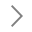

In [7]:
f"children: {tree['children']}"

In [8]:
len(tree["children"])

21

In [9]:
tree['children'][3]

{'tagName': 'script',
 'attributes': {},
 'content': "window.g_config = window.g_config || {};\n  window.g_config.regionID = 'NP';\n  window.g_config.language = 'en';",
 'children': []}

In [10]:
tagnames = []
attrs = []
cntnt = []
child = []

for i in tree['children']:
    if i['tagName']:
        tagnames.append(i['tagName'])

for i in tree['children']:
    if i['attributes']:
        attrs.append(i['attributes']) 

for i in tree['children']:
    if i['children']:
        child.append(i['children']) 

In [11]:
tagnames

['script',
 'script',
 'script',
 'script',
 'script',
 'script',
 'link',
 'script',
 'div',
 'input',
 'style',
 'div',
 'script',
 'div',
 'script',
 'script',
 'script',
 'script',
 'script',
 'script',
 'input']

In [12]:
attrs

[{'src': '//laz-g-cdn.alicdn.com/lzd/assets/0.0.2/??babel-polyfill/6.26.0/polyfill.min.js,react/16.2.0/react.production.min.js,react-dom/16.2.0/react-dom.production.min.js'},
 {'src': '//laz-g-cdn.alicdn.com/lzd/assets/0.0.5/next/0.19.21/next.min.js'},
 {'href': '//laz-g-cdn.alicdn.com/lzdmod/??site-nav-pc-daraz/5.4.86/pc/index.css,site-menu-nav-pc-daraz/5.1.1/pc/index.css,site-menu-pc-daraz/5.1.21/pc/index.css',
  'rel': ['stylesheet']},
 {'class': ['mui-zebra-module'],
  'data-module-id': '2553362700',
  'data-spm': '2553362700',
  'data-version': '5.4.86',
  'id': 'J_2553362700'},
 {'id': 'header-pc-config',
  'type': 'hidden',
  'value': '{"voyagerVersion":"2","voyagerEnv":"IDC","assetsRefactor":false,"regionID":"NP","language":"en","react":false,"needUmid":false,"channel":"default","version":{"nav":"5.4.85","search":"0.0.3","menu":"5.1.21","menuNav":"5.1.1","suffix":"-daraz"},"needRetCode":true,"retCodePageName":"","hideCategory":true,"needReact":false,"thymeleaf":true,"grayFilter

# Chunking HTML data

In [13]:
uq_tag_set = set()
uq_tag_ls = []
for i in tagnames:
    if i not in uq_tag_set:
        uq_tag_set.add(i)
        uq_tag_ls.append(i)

uq_tag_ls

['script', 'link', 'div', 'input', 'style']

In [16]:
from langchain_text_splitters import HTMLSectionSplitter

html = """
    <!DOCTYPE html>
    <html>
    <body>
        <div>
            <h1>Foo</h1>
            <p>Some intro text about Foo.</p>
            <div>
                <h2>Bar main section</h2>
                <p>Some intro text about Bar.</p>
                <h3>Bar subsection 1</h3>
                <p>Some text about the first subtopic of Bar.</p>
                <h3>Bar subsection 2</h3>
                <p>Some text about the second subtopic of Bar.</p>
            </div>
            <div>
                <h2>Baz</h2>
                <p>Some text about Baz</p>
            </div>
            <br>
            <p>Some concluding text about Foo</p>
        </div>
    </body>
    </html>
"""

headers_to_split_on = [("h1", "Header 1"), ("h2", "Header 2")]

html_splitter = HTMLSectionSplitter(headers_to_split_on=headers_to_split_on)
html_header_splits = html_splitter.split_text(html)
html_header_splits

[Document(page_content='Foo \n Some intro text about Foo.', metadata={'Header 1': 'Foo'}),
 Document(page_content='Bar main section \n Some intro text about Bar. \n Bar subsection 1 \n Some text about the first subtopic of Bar. \n Bar subsection 2 \n Some text about the second subtopic of Bar.', metadata={'Header 2': 'Bar main section'}),
 Document(page_content='Baz \n Some text about Baz \n \n \n Some concluding text about Foo', metadata={'Header 2': 'Baz'})]